# Multi-Class Logistic Regression

Students often ask how to perform non binary classification with Logistic Regression. Fortunately, the process with scikit-learn is pretty much the same as with binary classification. To expand our understanding, we'll go through a simple data set, as well as seeing how to use LogisiticRegression with a manual GridSearchCV (instead of LogisticRegressionCV). 

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

## Data

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
df= pd.read_csv('..\data\iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


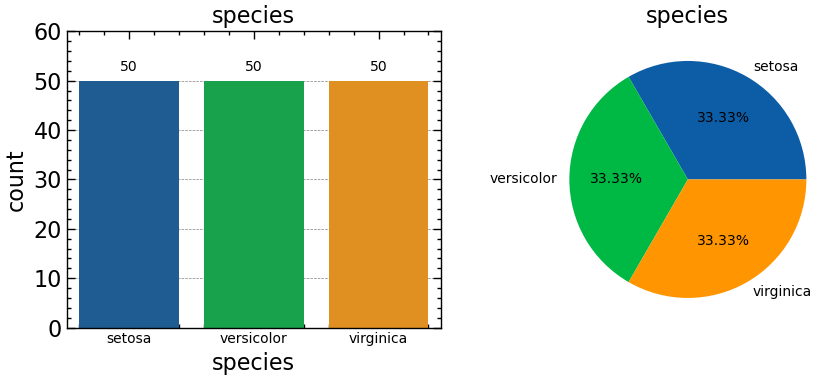

In [29]:
plt.style.use(['science','notebook','grid'])

variable = 'species'

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
ax = sns.countplot(x=variable, data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 2, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.ylim(0, 60)
plt.title(variable)
plt.xticks(size= 10)

# pie chart
plt.subplot(1,2,2)
counts = df['species'].value_counts()
plt.pie(counts, labels= counts.index, autopct='%0.2f%%', textprops={'fontsize':10})
plt.title(variable)

plt.tight_layout()
plt.show()

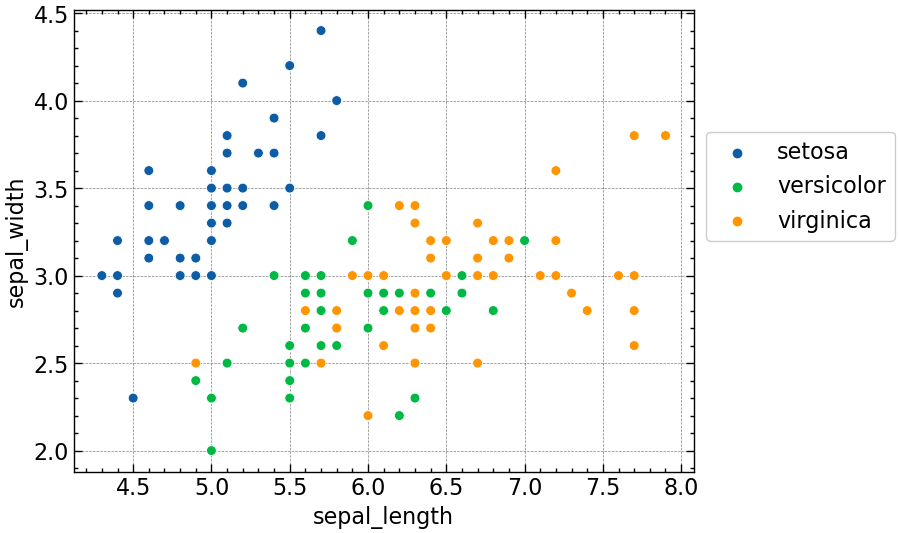

In [37]:
sns.scatterplot(x='sepal_length', y='sepal_width', data= df, hue='species', s=50)
plt.legend(loc=(1.02, 0.5));

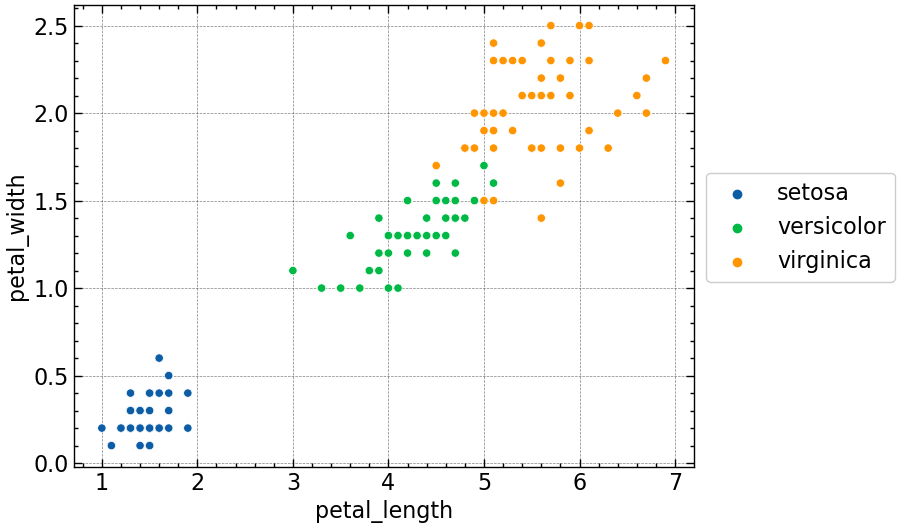

In [38]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.legend(loc=(1.02, 0.4));

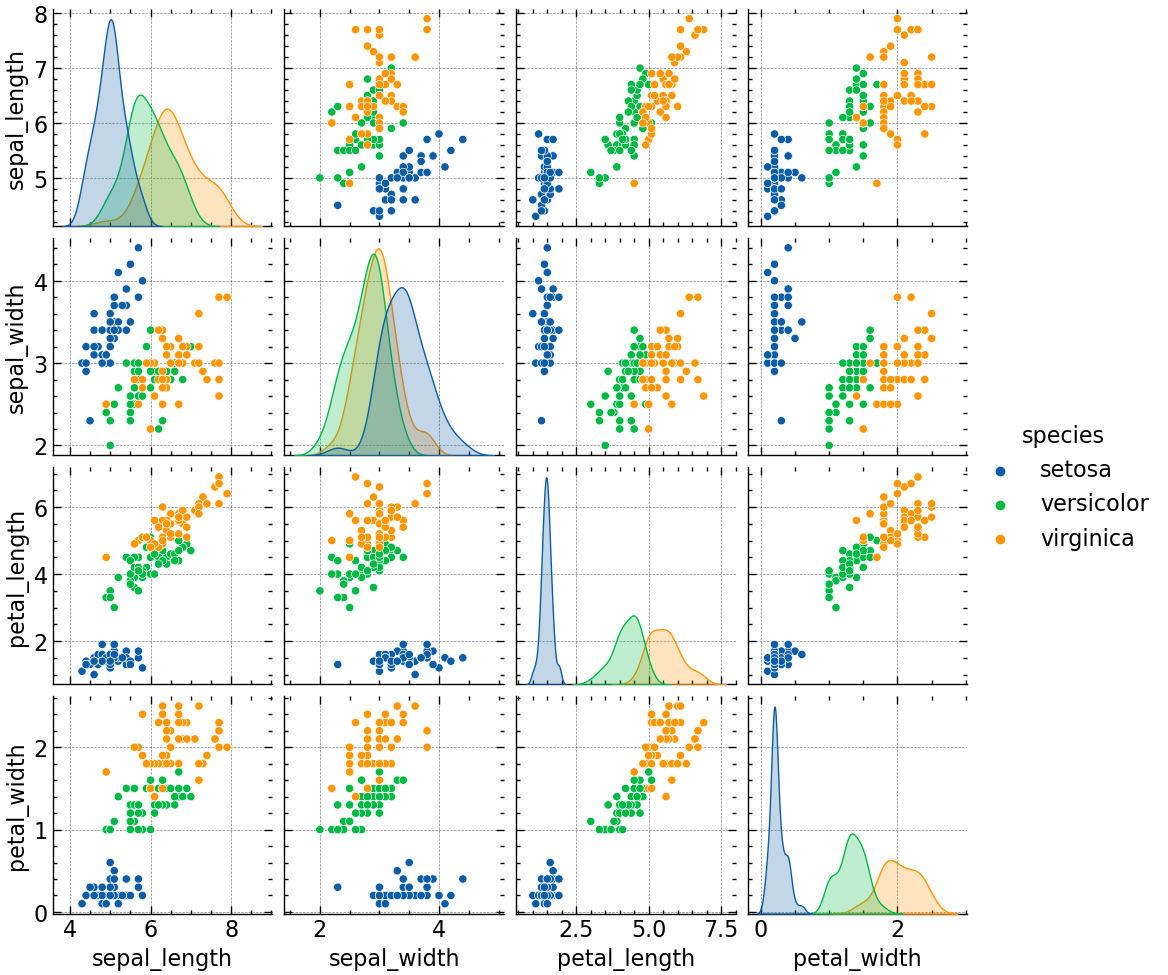

In [39]:
sns.pairplot(df, hue='species');

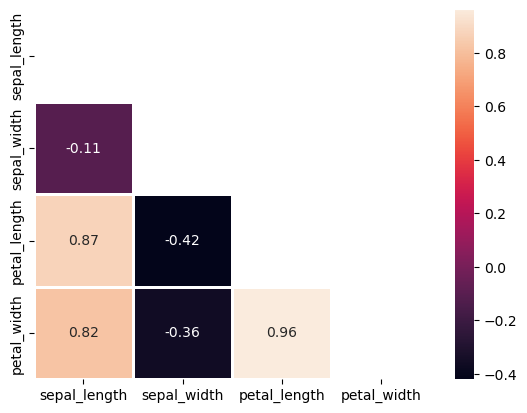

In [40]:
plt.style.use('default')

# matrix
matrix = df.corr()

# mask 
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]= True

# heatmap
sns.heatmap(matrix, mask=mask, lw=1, annot=True);

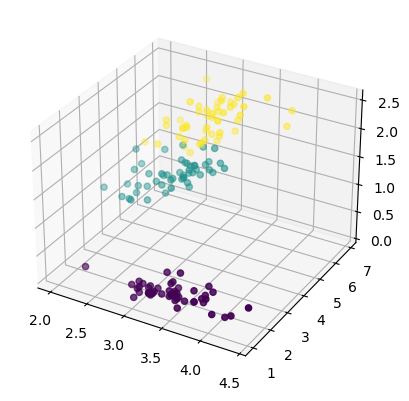

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'], df['petal_length'], df['petal_width'], c=colors);

In [56]:
# Create X and y
X = df.drop('species', axis=1)
y = df['species']

In [57]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [58]:
# scale data
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [61]:
# Create Model
from sklearn.linear_model import LogisticRegression

In [63]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [64]:
model = LogisticRegression(solver='saga', multi_class = 'ovr' , max_iter = 5000)

### Hyperparameter Tuning GridSearchCV

Main parameter choices are regularization penalty choice and regularization C value.

In [65]:
# Penalty
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.linspace(0,4,10)

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(model, param_grid = {'C':C, 'penalty':penalty})

In [68]:
grid_search.fit(scaler_X_train, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
C:\Users\ibrahim\anaconda3\lib\sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
                         'penalty': ['l1', 'l2']})

In [70]:
grid_search.best_params_

{'C': 3.5555555555555554, 'penalty': 'l1'}

## Pediction 

In [71]:
prediction = grid_search.predict(scaler_X_test)

### Model Performance on Classification Tasks

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [75]:
accuracy_score(y_test, prediction)

0.9555555555555556

In [76]:
confusion_matrix(y_test, prediction)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

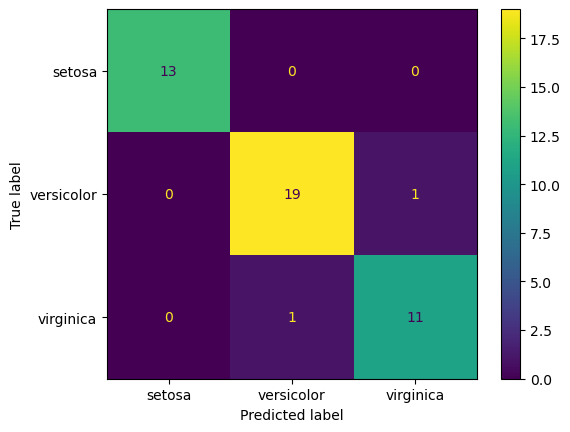

In [78]:
ConfusionMatrixDisplay.from_estimator(grid_search, scaler_X_test, y_test);

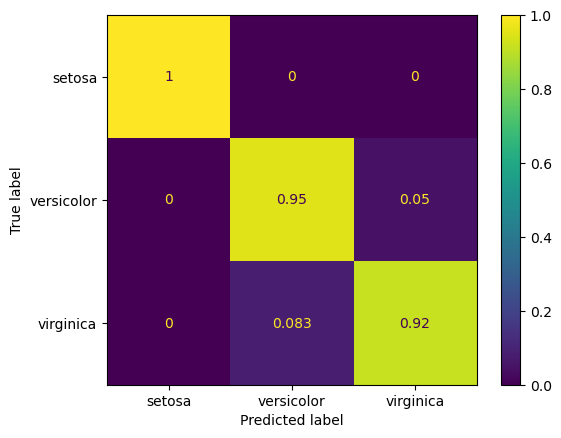

In [83]:
ConfusionMatrixDisplay.from_estimator(grid_search, scaler_X_test, y_test, normalize='true');

In [82]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Evaluation Curve and AUC

In [98]:
from sklearn.metrics import roc_curve, auc

In [100]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

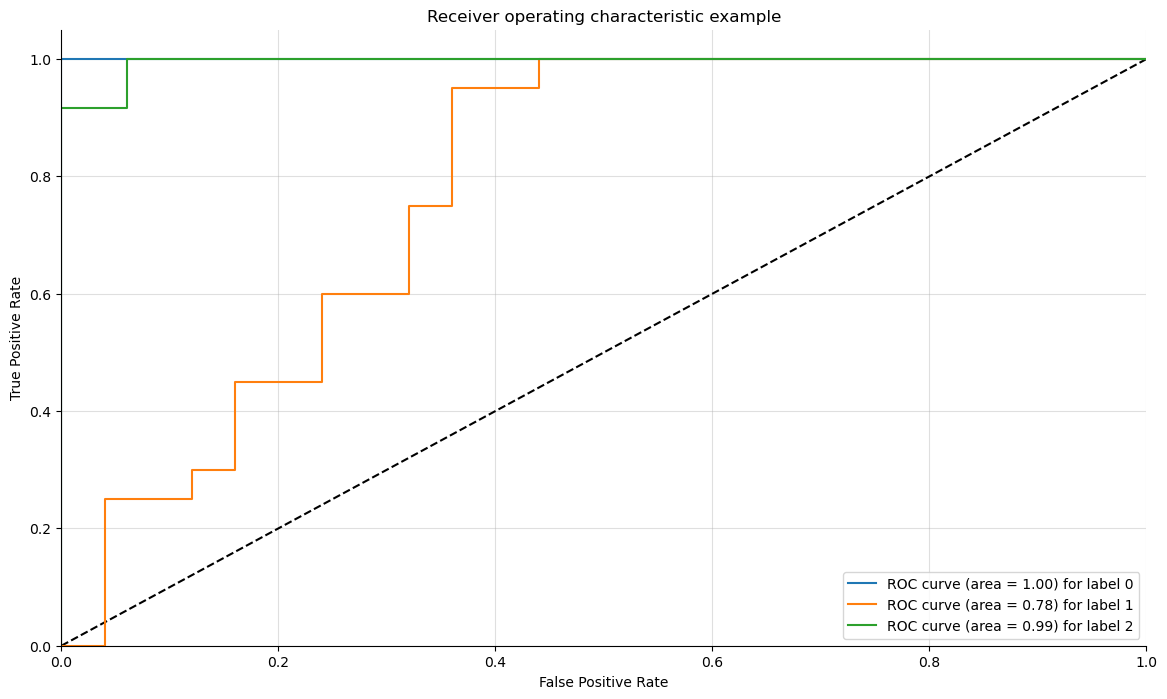

In [101]:
plot_multiclass_roc(grid_search, scaler_X_test, y_test, n_classes=3, figsize=(14,8))